# Neural network with Keras on fashion

In this notebook, a neural network is trained to classify clothing items, such as sneakers and shirts (dataset from Zalando:https://github.com/zalandoresearch/fashion-mnist). It uses [tf.keras](https://keras.io/), an API for creating and training models in TensorFlow.

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion dataset.

Here we use the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) from Zalando (MIT License). This contains 70,000 grayscale images in 10 categories ('T-shirt/top', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'). The images show single garments with low resolution (28 x 28 pixels), as seen here:

Load the dataset goes via Keras functions:

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Data set and formats

Let's first explore the format of the dataset before training the model. The following shows that there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [13]:
X_train.shape


(60000, 28, 28)

Fortunately, there are probably just as many labels :-):

In [14]:
len(Y_train)

60000

Test data looks the same and is labeled accordingly:

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
len(Y_test)

10000

# Preprocess data

The data must be preprocessed before training the network. If you examine the first image in the training set, you will notice that the pixel values range from 0 to 255:

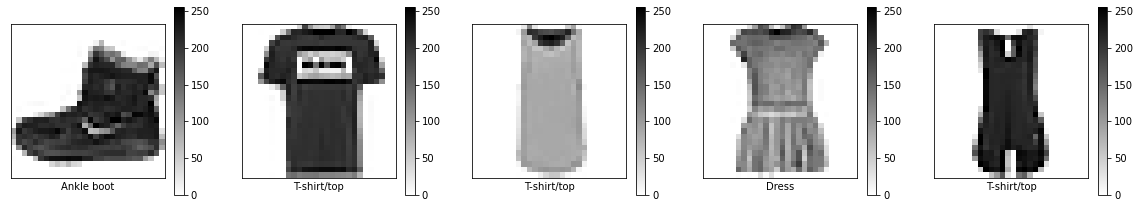

In [17]:
plt.figure(figsize=(20,20))

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
    plt.colorbar()
plt.show()



# Normalization

In [18]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# One-hot encoding

In [19]:
from keras.utils import np_utils
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# Model definition

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

# Compile and train model

In [21]:
model.compile(loss="mse", optimizer="sgd", metrics="accuracy")
model.fit(X_train, Y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0818 - accuracy: 0.3879
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0592 - accuracy: 0.6241
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0467 - accuracy: 0.6790
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0412 - accuracy: 0.7273
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0377 - accuracy: 0.7646


# Model evaluation

In [22]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.7652
Test score: 0.037180881947278976
Test accuracy: 0.7652000188827515
